In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
np.random.seed(50)
citrus_acid = np.random.uniform(1, 5, 200)
density_wine = np.random.uniform(9930, 9970, 200)

quality = 15000 * (citrus_acid / density_wine)


def analysis(q):
    if q>0 and q<=3 :
        return 'normal'
    elif q>3 and q < 6:
        return 'good'
    else:
        return 'best'

print(quality)
quality_content=np.array([analysis(b) for b in quality])  #to make the results come in array we use this
quality_content


data = pd.DataFrame({ 'Citrus_acid': citrus_acid,'Density_wine': density_wine,'Quality': quality_content})
data

[4.48284667 2.87868539 3.04950281 3.89432652 3.78985672 7.51699046
 3.9751986  6.15639118 6.09523668 3.3792912  3.59360004 3.63219146
 2.38486748 7.38750679 7.00395061 4.88283533 3.4005471  6.86696671
 5.57834023 3.86882414 4.57198327 4.658987   7.09567674 4.94361989
 5.53714718 1.82458391 3.47995044 1.84698544 2.59192077 7.09305962
 7.17109354 5.82398627 5.92234099 4.29623779 7.132439   3.95814281
 5.63007107 5.41754827 5.12741184 2.84787071 5.62230579 6.8001806
 6.30406873 4.10609735 7.04327037 6.23216708 5.87854621 2.26052987
 7.02729643 3.84769996 3.29005771 5.22993731 4.32791175 3.04165832
 6.5558466  2.58249259 2.87284641 5.49269418 4.39135502 1.94856303
 2.34837032 2.18786869 4.39099579 4.76847283 7.29626555 5.03457177
 4.68043032 7.05625427 7.05773406 3.03194994 5.6174775  7.32259707
 2.87485599 5.81591807 6.3209169  7.16757886 6.66052158 4.05734761
 1.53976388 1.71719744 1.59016847 5.05529395 3.82111083 2.19915587
 6.7285184  6.4582428  5.95117096 6.58285331 3.93635954 6.01507

,Citrus_acid,Density_wine,Quality
0,2.978407,9966.010882,good
1,1.912332,9964.613144,normal
2,2.021896,9945.370540,good
3,2.585320,9958.023388,good
4,2.509260,9931.485188,good
...,...,...,...
195,1.841427,9958.516302,normal
196,2.848706,9958.097338,good
197,1.336040,9937.516654,normal
198,2.326009,9932.659057,good


In [4]:
L_C = LabelEncoder()
data['Quality']=L_C.fit_transform(data["Quality"])
data

,Citrus_acid,Density_wine,Quality
0,2.978407,9966.010882,1
1,1.912332,9964.613144,2
2,2.021896,9945.370540,1
3,2.585320,9958.023388,1
4,2.509260,9931.485188,1
...,...,...,...
195,1.841427,9958.516302,2
196,2.848706,9958.097338,1
197,1.336040,9937.516654,2
198,2.326009,9932.659057,1


In [5]:
X=data[["Citrus_acid","Density_wine"]]
Y=data["Quality"]

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=50)
print(X_train,X_test,Y_train,Y_test)

     Citrus_acid  Density_wine
114     3.009714   9963.300110
187     1.603096   9966.888273
76      4.414890   9942.667241
122     2.480089   9966.194011
142     2.660344   9969.291971
..           ...           ...
132     4.320936   9964.624559
33      2.846991   9940.059805
109     4.844540   9930.959016
139     2.622604   9954.219734
176     2.003973   9959.451948

[140 rows x 2 columns]      Citrus_acid  Density_wine
112     2.523410   9939.012128
165     1.522863   9938.249760
12      1.581867   9949.404573
73      3.864069   9965.929926
144     4.181078   9943.897907
20      3.028736   9936.835893
199     4.953303   9965.643168
8       4.042147   9947.472832
39      1.888158   9945.101588
88      2.606116   9930.938926
81      3.355640   9956.808909
197     1.336040   9937.516654
69      2.008035   9934.376371
160     2.092542   9932.606952
25      1.209035   9939.538173
99      2.051508   9962.311462
151     4.571059   9939.562028
23      3.285492   9968.886215
138     2.65045

In [7]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

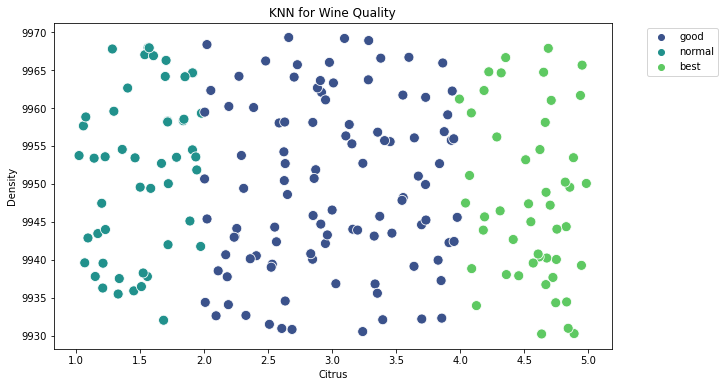

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X,x=citrus_acid,y=density_wine,hue=L_C.inverse_transform(Y),palette="viridis",s=100)
plt.title("KNN for Wine Quality")
plt.xlabel("Citrus")
plt.ylabel("Density")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()

Enter your Acid Content  : 4
Enter your Density : 9951


C:\Users\student\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\student\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Distance = [[0.1285187  1.17627664 1.36729596]]


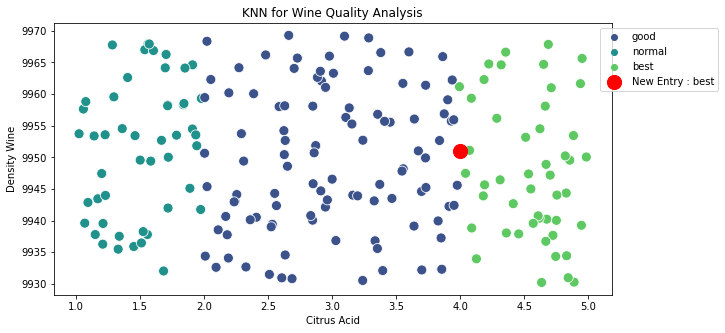

Citrus_Acid =4.0 | Density_Wine=9951.0 | Quality_Analysis =best


In [9]:
def predictWine(data,model,L_C):
    p=model.predict(data)
    P_C=L_C.inverse_transform(p)[0]
    return P_C
    # input_data=np.array(['height','weight'])
    
user_C=float(input("Enter your Acid Content  : "))
user_D=float(input("Enter your Density : "))


input_data=np.array([[user_C,user_D]])
predicted_Wine=predictWine(input_data,model,L_C)

D,I=model.kneighbors(input_data,n_neighbors=3)

print(f"Distance = {D}")

plt.figure(figsize=(10,5))
#training data plot
sns.scatterplot(data=X,x=citrus_acid,y=density_wine,hue=L_C.inverse_transform(Y),palette="viridis",s=100)

#input data plot
plt.scatter(input_data[0,0],input_data[0,1],color='red',s=200,label=f'New Entry : {predicted_Wine}')
plt.title("KNN for Wine Quality Analysis")
plt.xlabel("Citrus Acid")
plt.ylabel("Density Wine")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()
print(f"Citrus_Acid ={user_C} | Density_Wine={user_D} | Quality_Analysis ={predicted_Wine}")